# **IMPORTING ESSENTIAL LIBRARIES**

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, Evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer,label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,precision_recall_curve,auc,roc_curve,log_loss,average_precision_score
from imblearn.over_sampling import SMOTE

# Statistical
from scipy.stats import chi2_contingency,skew

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Model saving/loading
import joblib
import os

# **LOADING DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/DataMining/thyroid_cancer_risk_data.csv')
df.shape

(212691, 17)

In [ ]:
# Creating a sample using 30% of data
df_sample = df.sample(frac=0.30, random_state=42)
df_sample.shape

(63807, 17)

# **EXPLORATORY DATA ANALYSIS & VISUALIZATION**

In [ ]:
# Display Dataset
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [ ]:
# Initial Inspection
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63807 entries, 82562 to 166584
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           63807 non-null  int64  
 1   Age                  63807 non-null  int64  
 2   Gender               63807 non-null  object 
 3   Country              63807 non-null  object 
 4   Ethnicity            63807 non-null  object 
 5   Family_History       63807 non-null  object 
 6   Radiation_Exposure   63807 non-null  object 
 7   Iodine_Deficiency    63807 non-null  object 
 8   Smoking              63807 non-null  object 
 9   Obesity              63807 non-null  object 
 10  Diabetes             63807 non-null  object 
 11  TSH_Level            63807 non-null  float64
 12  T3_Level             63807 non-null  float64
 13  T4_Level             63807 non-null  float64
 14  Nodule_Size          63807 non-null  float64
 15  Thyroid_Cancer_Risk  63807 non-null 

In [ ]:
# Summary Statistics
df_sample.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000
mean,106626.574639,51.973827,5.041010,2.002192,8.242059,2.504073
std,61294.419017,21.634870,2.858202,0.866376,2.164785,1.443599
min,1.000000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53473.000000,33.000000,2.570000,1.250000,6.360000,1.260000
50%,106970.000000,52.000000,5.030000,2.010000,8.230000,2.510000
75%,160023.500000,71.000000,7.510000,2.750000,10.130000,3.760000
max,212691.000000,89.000000,10.000000,3.500000,12.000000,5.000000


**Dropping Irrelevant and Potentially Leaky features**

In [ ]:
df_sample.drop(columns=['Patient_ID','Diagnosis'], inplace=True)

**Listing Unique Value Counts**

In [ ]:
print(df_sample.nunique())

Age                     75
Gender                   2
Country                 10
Ethnicity                5
Family_History           2
Radiation_Exposure       2
Iodine_Deficiency        2
Smoking                  2
Obesity                  2
Diabetes                 2
TSH_Level              991
T3_Level               301
T4_Level               751
Nodule_Size            501
Thyroid_Cancer_Risk      3
dtype: int64


**Check Missing Values**

In [ ]:
print(df_sample.isnull().sum())

Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
dtype: int64


**Check Duplicate Rows and Columns**

In [ ]:
duplicate_rows = df_sample.duplicated()
print(f"Duplicate rows: {duplicate_rows.sum()}")

duplicate_columns = df_sample.T.duplicated()
print(f"Duplicate columns: {duplicate_columns.sum()}")

Duplicate rows: 0
Duplicate columns: 0


**Listing Categorical and Numerical Features**

In [ ]:
categorical_features = df_sample.select_dtypes(include=['object']).columns
numerical_features = df_sample.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", categorical_features)
print()
print("Numerical Features:", numerical_features)

Categorical Features: Index(['Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'Thyroid_Cancer_Risk'],
      dtype='object')

Numerical Features: Index(['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size'], dtype='object')


**Target and Feature Setup**

In [ ]:
target_col = 'Thyroid_Cancer_Risk'
features = [col for col in df_sample.columns if col != target_col]

print("Target Column:", target_col)
print("Features:", features)

Target Column: Thyroid_Cancer_Risk
Features: ['Age', 'Gender', 'Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']


**Outlier Analysis**

In [ ]:
# Univariate Analysis for Numerical Features

print("Outlier Analysis by IQR method")

# IQR method to detect outliers
for col in numerical_features:
    Q1 = df_sample[col].quantile(0.25)
    Q3 = df_sample[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_sample[(df_sample[col] < lower) | (df_sample[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


Outlier Analysis by IQR method
Age: 0 outliers
TSH_Level: 0 outliers
T3_Level: 0 outliers
T4_Level: 0 outliers
Nodule_Size: 0 outliers


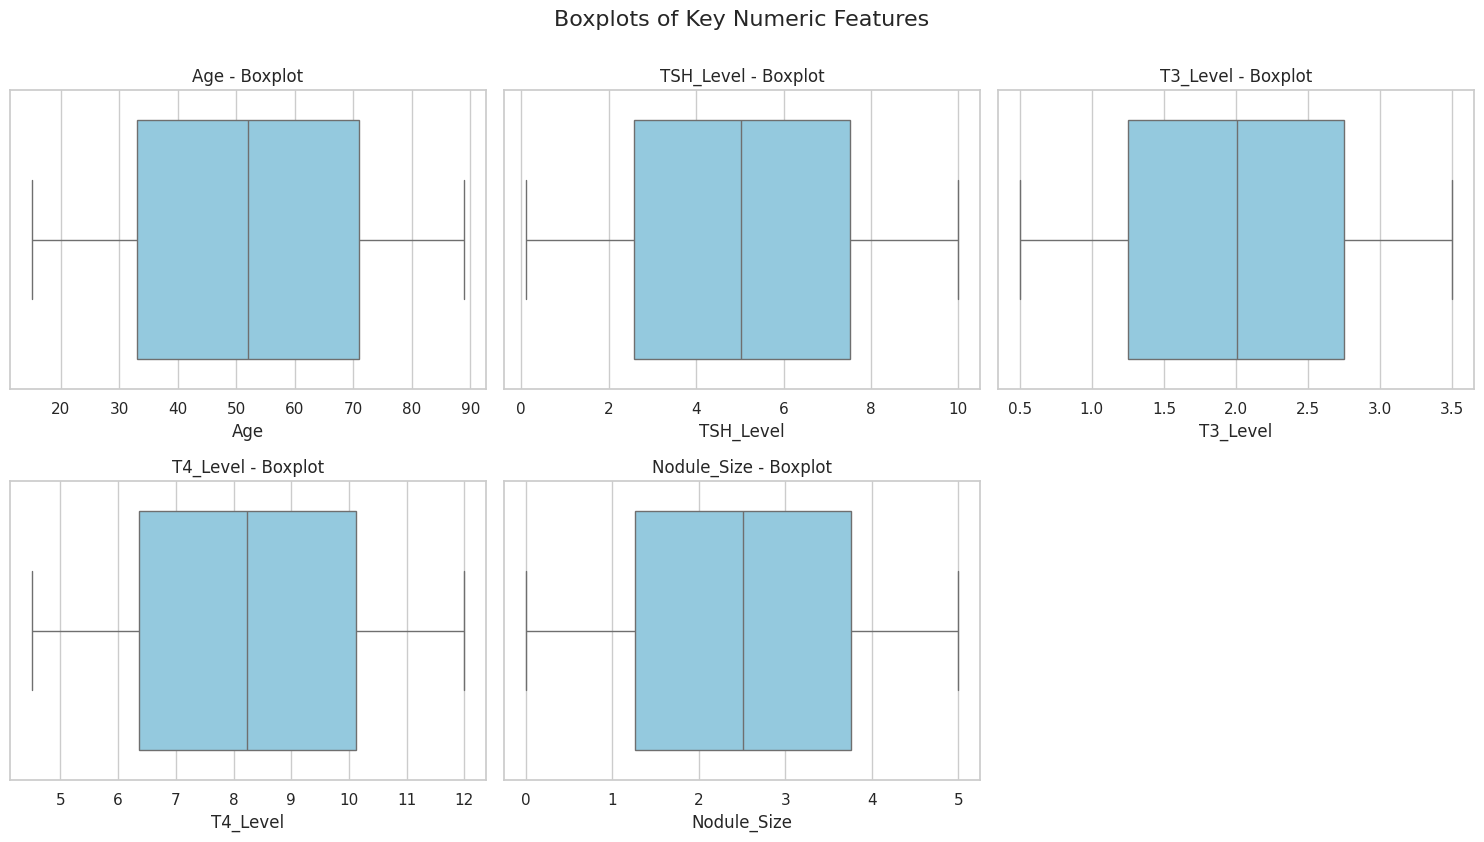

In [ ]:
# Box Plot Analysis

sns.set(style="whitegrid")
# Plot setup
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_sample, x=col, color='skyblue')
    plt.title(f'{col} - Boxplot')
    plt.tight_layout()

plt.suptitle('Boxplots of Key Numeric Features', fontsize=16, y=1.05)
plt.show()

In [ ]:
# Unique values in categorical features
for col in categorical_features:
    print(f"{col}: {df_sample[col].unique()}")

Gender: ['Male' 'Female']
Country: ['Russia' 'India' 'Brazil' 'Nigeria' 'China' 'USA' 'Japan' 'South Korea'
 'UK' 'Germany']
Ethnicity: ['Middle Eastern' 'Asian' 'Caucasian' 'Hispanic' 'African']
Family_History: ['No' 'Yes']
Radiation_Exposure: ['No' 'Yes']
Iodine_Deficiency: ['Yes' 'No']
Smoking: ['No' 'Yes']
Obesity: ['Yes' 'No']
Diabetes: ['No' 'Yes']
Thyroid_Cancer_Risk: ['Low' 'High' 'Medium']


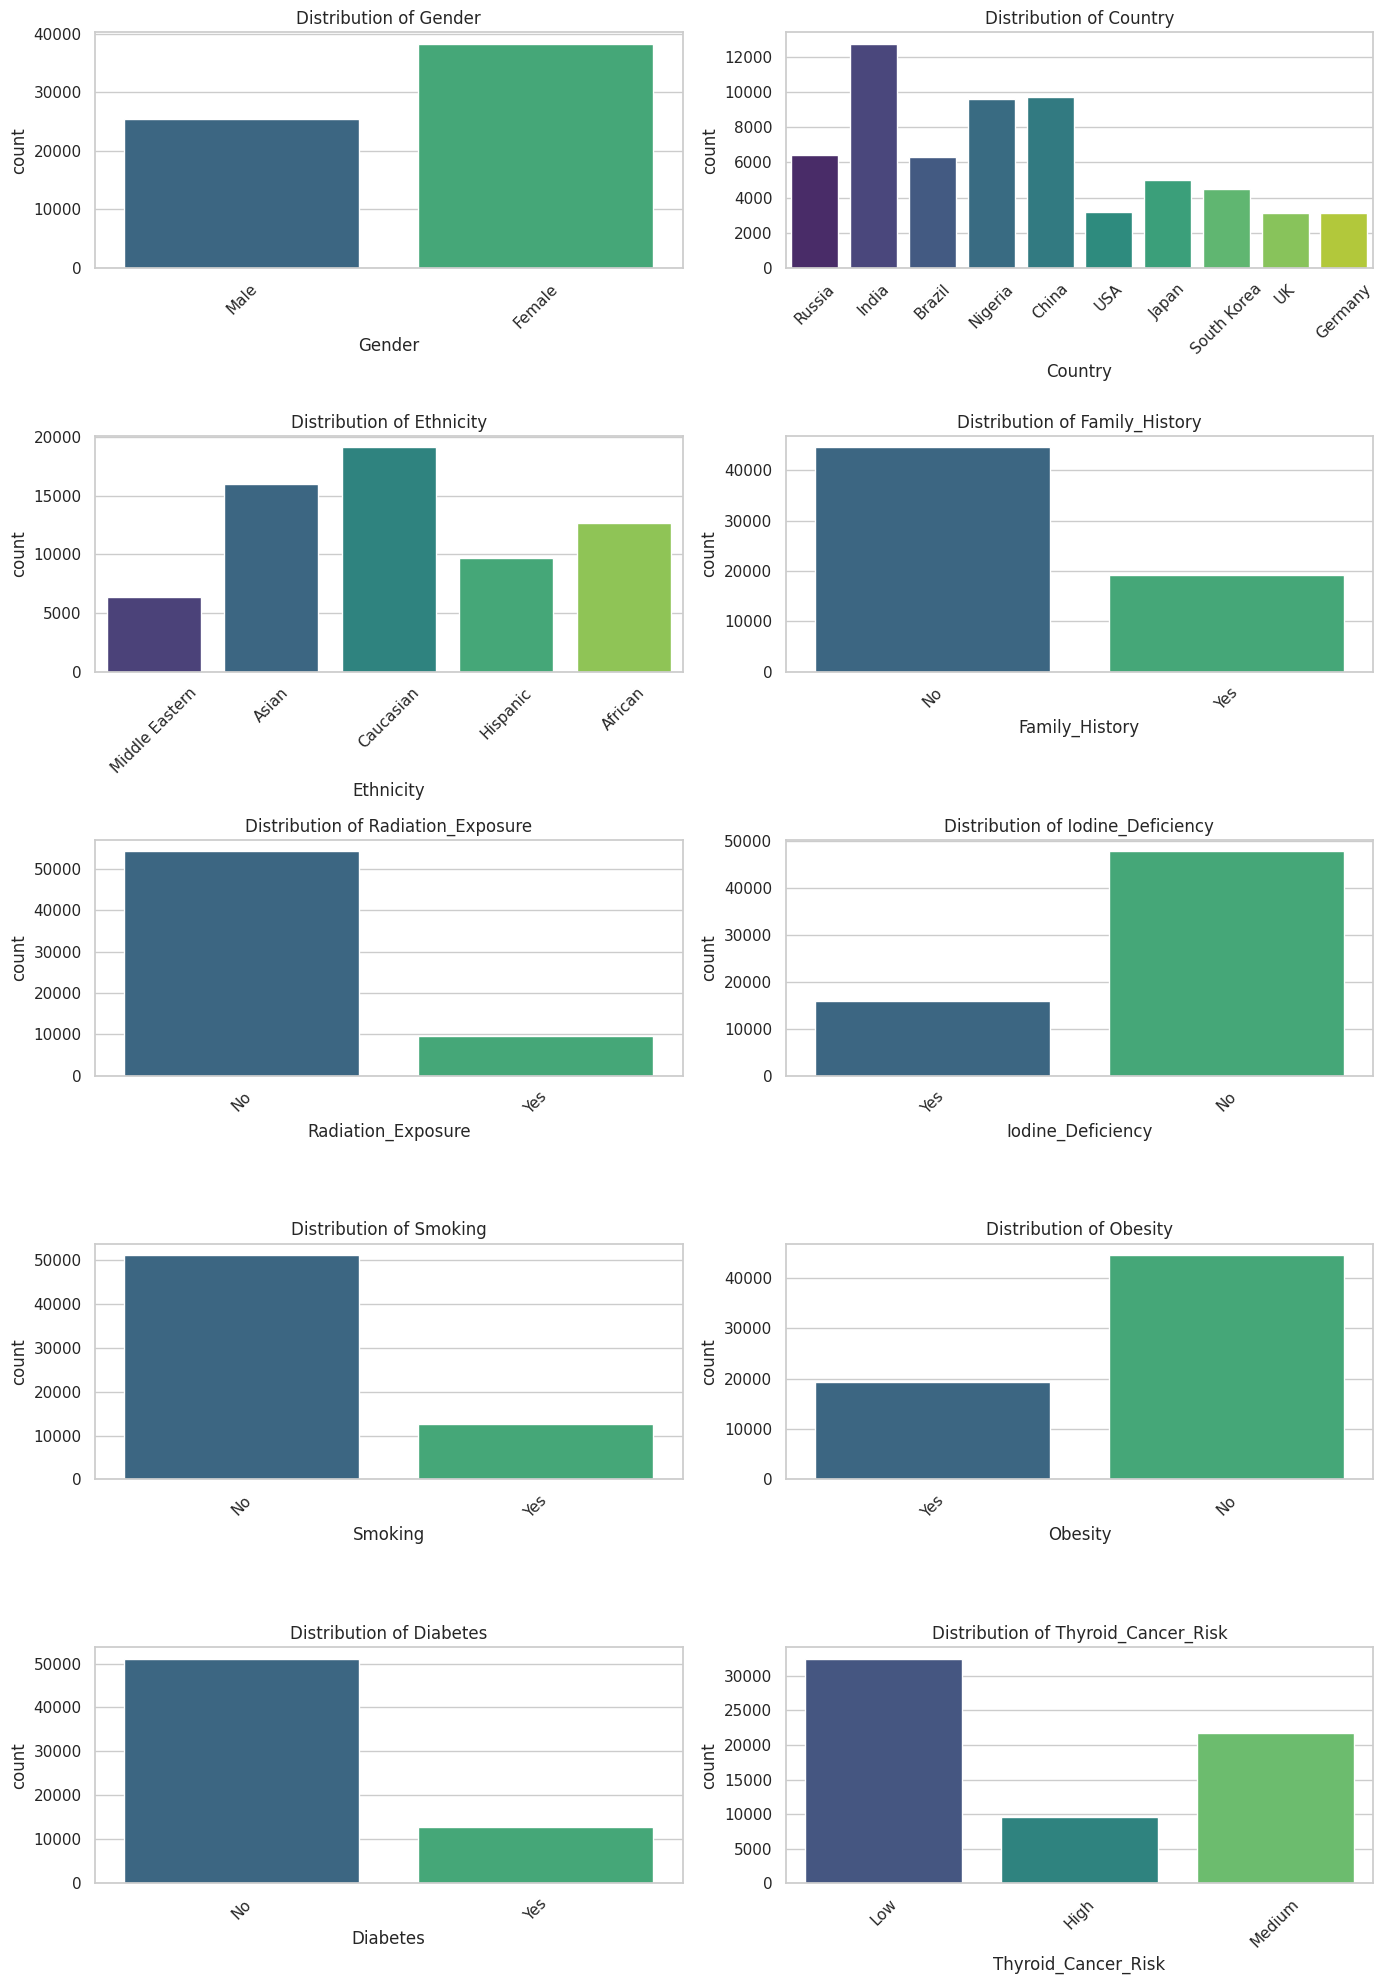

In [ ]:
# Univariate Analysis for Categorical Features
plt.figure(figsize=(14, 20))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df_sample, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

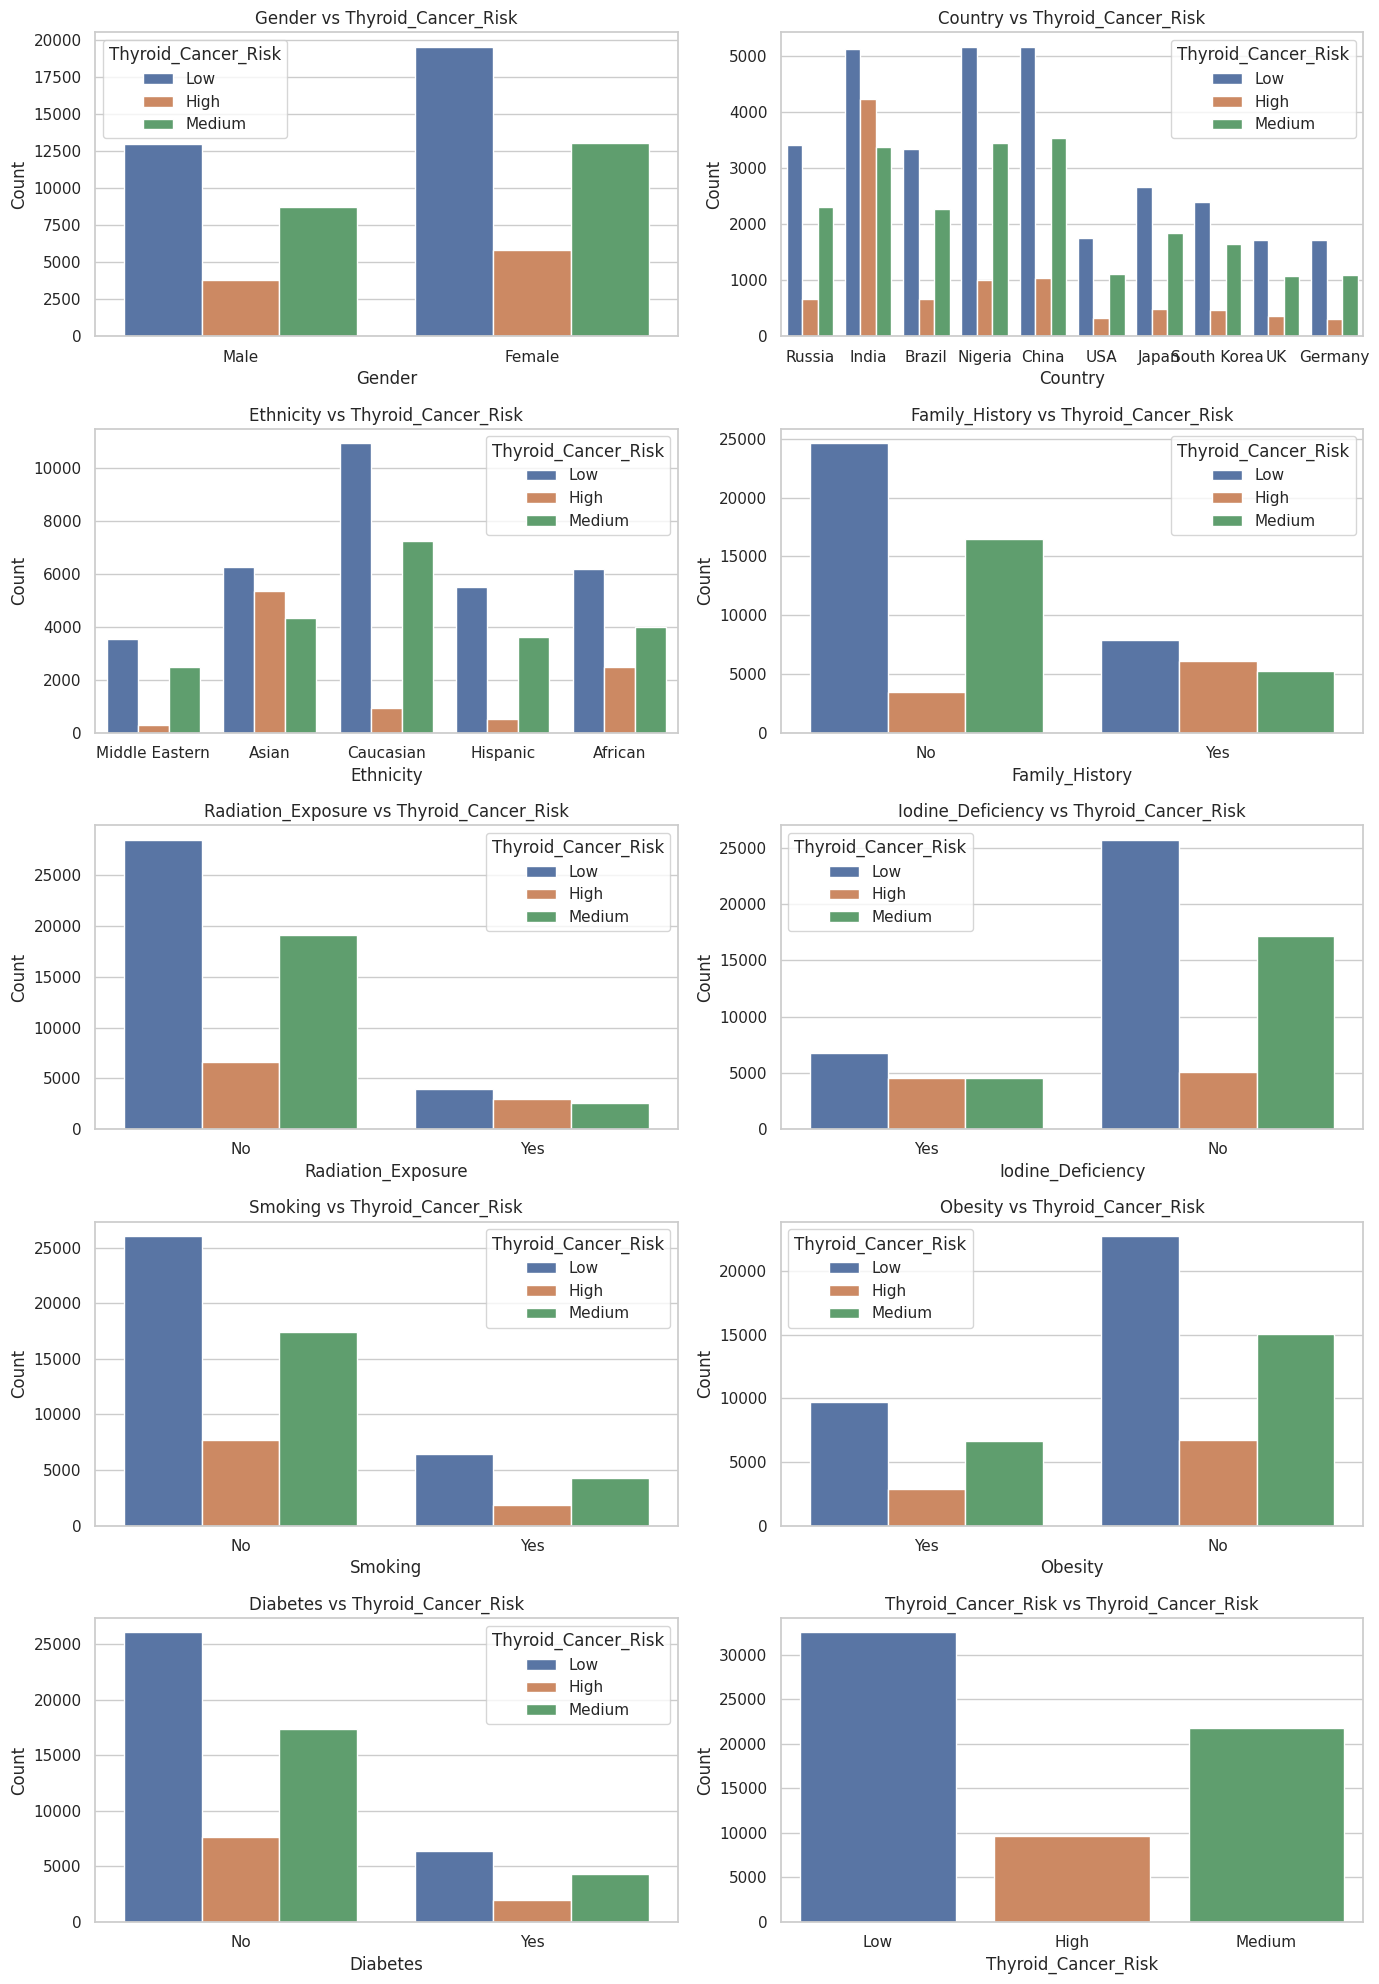

In [ ]:
# Bivariate Analysis (Categorical vs. Target)

plt.figure(figsize=(14, 20))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df_sample, x=col, hue='Thyroid_Cancer_Risk')
    plt.title(f'{col} vs Thyroid_Cancer_Risk')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Statistical Testing: Correlations**

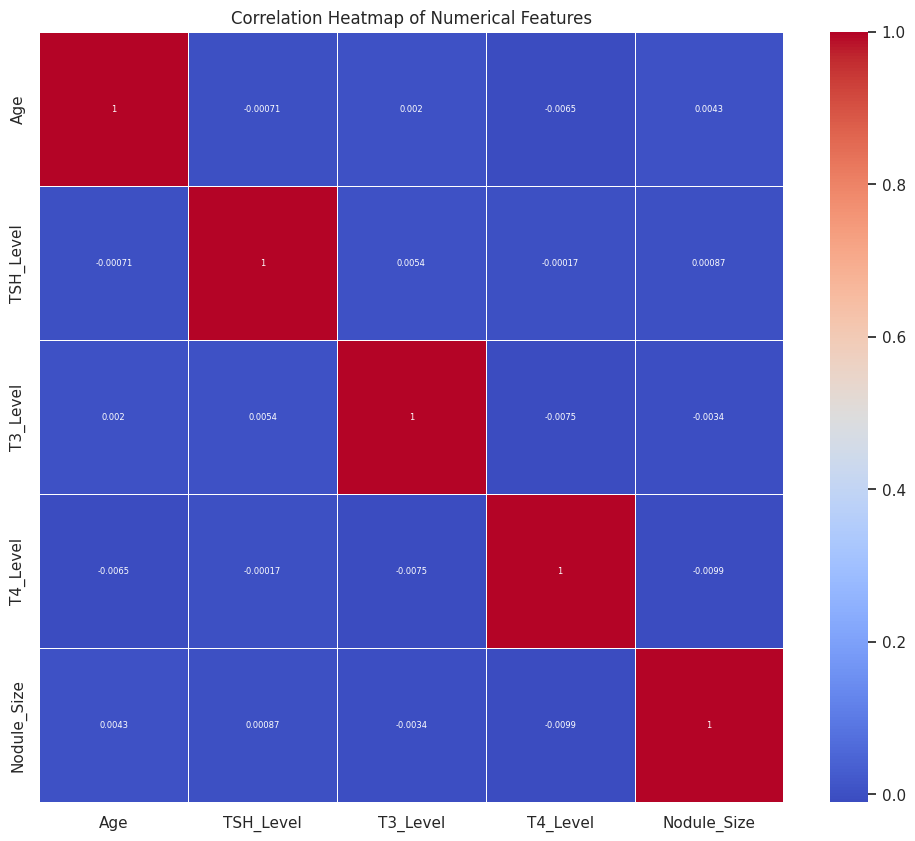

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df_sample[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.4, annot_kws={"size":6})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Statistical Testing: Chi-Square Test**

In [ ]:
significant_features = []
non_significant_features = []

results = []

for col in categorical_features:
    contingency = pd.crosstab(df_sample[col], df_sample['Thyroid_Cancer_Risk'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    results.append({'Feature': col, 'Chi2 Stat': chi2, 'P-Value': p})

    if p < 0.05:
        significant_features.append(col)
    else:
        non_significant_features.append(col)

# Convert to DataFrame
chi_df = pd.DataFrame(results)

# Display
print("============ Chi-Square Test Results ============")
print(chi_df.to_string(index=False))

print("\n✅ Significant Categorical Features (p < 0.05):")
print(significant_features)

print("\n❌ Non-Significant Categorical Features (p >= 0.05):")
print(non_significant_features)

============ Chi-Square Test Results ============
            Feature     Chi2 Stat  P-Value
             Gender      1.665836 0.434779
            Country   4159.266638 0.000000
          Ethnicity   7329.984933 0.000000
     Family_History   6039.606992 0.000000
 Radiation_Exposure   2242.549549 0.000000
  Iodine_Deficiency   3084.465144 0.000000
            Smoking      0.072743 0.964282
            Obesity      2.297780 0.316988
           Diabetes      1.986675 0.370339
Thyroid_Cancer_Risk 127614.000000 0.000000

✅ Significant Categorical Features (p < 0.05):
['Country', 'Ethnicity', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Thyroid_Cancer_Risk']

❌ Non-Significant Categorical Features (p >= 0.05):
['Gender', 'Smoking', 'Obesity', 'Diabetes']


**Dropping Non-Significant Categorical Features**

In [ ]:
df_sample.drop(columns=['Gender', 'Smoking', 'Obesity', 'Diabetes'], inplace=True)

# Updating Categorical Features
categorical_features = df_sample.select_dtypes(include=['object']).columns

# Updating features
features = [col for col in df_sample.columns if col != target_col]

**Count Plot for Thyroid Cancer Risk based on Family History**

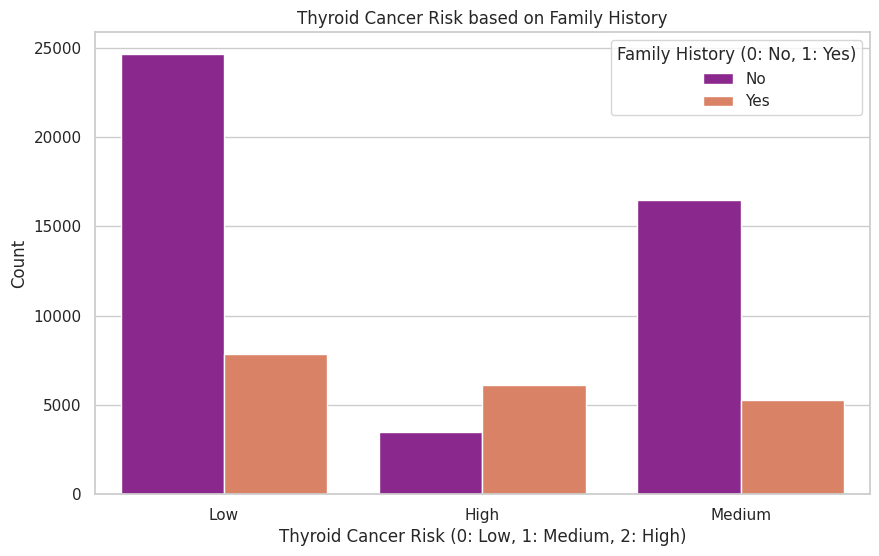

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='Thyroid_Cancer_Risk', hue='Family_History', palette='plasma')
plt.title('Thyroid Cancer Risk based on Family History')
plt.xlabel('Thyroid Cancer Risk (0: Low, 1: Medium, 2: High)')
plt.ylabel('Count')
plt.legend(title='Family History (0: No, 1: Yes)')
plt.show()

**Count Plot for Thyroid Cancer Risk based on Radiation Exposure**

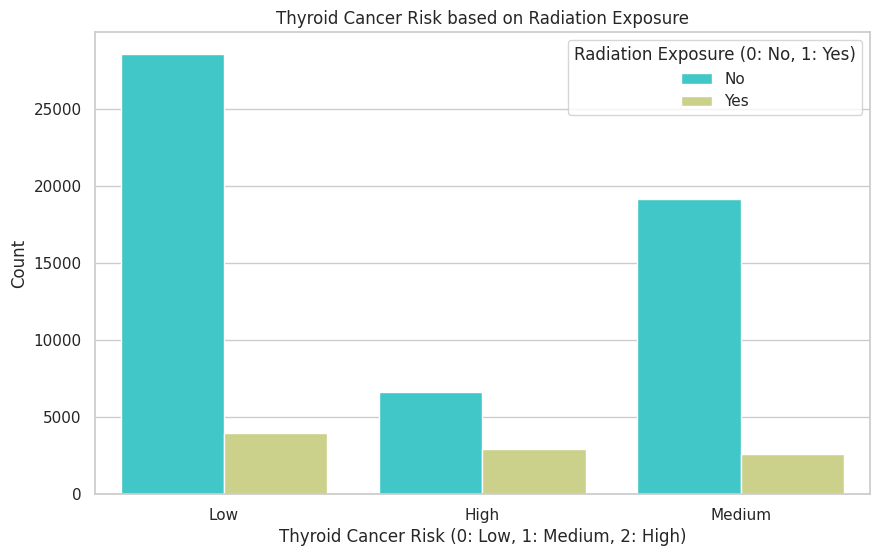

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='Thyroid_Cancer_Risk', hue='Radiation_Exposure', palette='rainbow')
plt.title('Thyroid Cancer Risk based on Radiation Exposure')
plt.xlabel('Thyroid Cancer Risk (0: Low, 1: Medium, 2: High)')
plt.ylabel('Count')
plt.legend(title='Radiation Exposure (0: No, 1: Yes)')
plt.show()

**Count Plot for Thyroid Cancer Risk based on Iodine Deficiency**

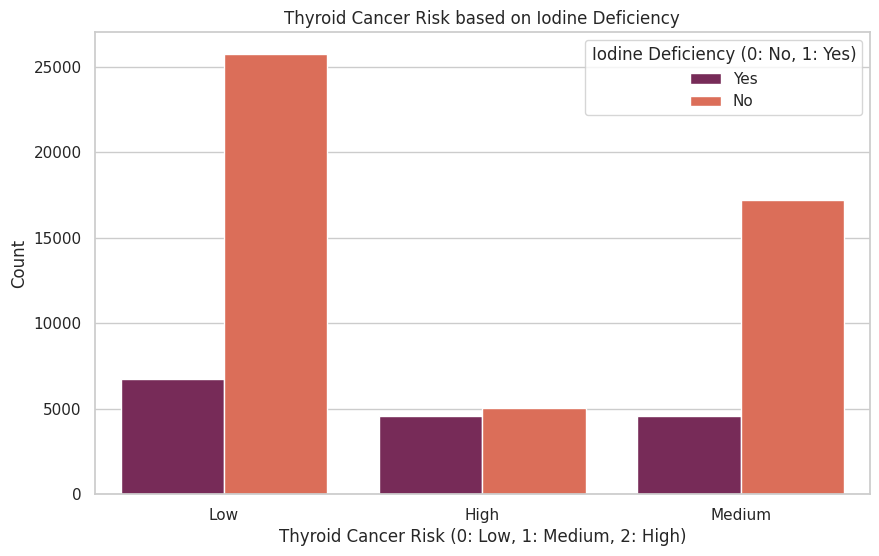

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sample, x='Thyroid_Cancer_Risk', hue='Iodine_Deficiency', palette='rocket')
plt.title('Thyroid Cancer Risk based on Iodine Deficiency')
plt.xlabel('Thyroid Cancer Risk (0: Low, 1: Medium, 2: High)')
plt.ylabel('Count')
plt.legend(title='Iodine Deficiency (0: No, 1: Yes)')
plt.show()

**Skewness Analysis**

In [ ]:
# Numerical Data Distribution

# Create a copy to store transformed values
df_transformed = df_sample.copy()

transformations = []

for col in numerical_features:
    col_skew = skew(df_sample[col])

    if col_skew > 1:
        # Apply log1p (log(x+1)) to right-skewed
        df_transformed[col] = np.log1p(df_sample[col])
        transformations.append((col, col_skew, 'log1p'))

    elif col_skew < -1:
        # Apply square to left-skewed
        df_transformed[col] = np.square(df_sample[col])
        transformations.append((col, col_skew, 'square'))

    else:
        # No transformation needed
        transformations.append((col, col_skew, 'none'))


# Convert to DataFrame for display
transformation_df = pd.DataFrame(transformations, columns=['Feature', 'Original Skewness', 'Applied Transformation'])

print("=== Feature Transformations for Skewness Correction ===")
print(transformation_df.to_string(index=False))

=== Feature Transformations for Skewness Correction ===
    Feature  Original Skewness Applied Transformation
        Age          -0.000175                   none
  TSH_Level           0.005549                   none
   T3_Level          -0.004806                   none
   T4_Level           0.010184                   none
Nodule_Size          -0.004839                   none


# **DATA PREPROCESSING**

**Feature Engineering**

In [ ]:
# Binning/Descretization
df_sample['TSH_Binned'] = pd.qcut(df_sample['TSH_Level'], q=4, labels=["Low", "Medium", "High", "Very High"])
df_sample['T3_Binned'] = pd.qcut(df_sample['T3_Level'], q=4, labels=["Low", "Medium", "High", "Very High"])
df_sample['T4_Binned'] = pd.qcut(df_sample['T4_Level'], q=4, labels=["Low", "Medium", "High", "Very High"])
df_sample['Age_Binned'] = pd.qcut(df_sample['Age'], q=4, labels=["Young", "Middle-aged", "Elderly", "Very Elderly"])
df_sample['Nodule_Size_Binned'] = pd.qcut(df_sample['Nodule_Size'], q=4, labels=["Small", "Medium", "Large", "Very Large"])

# DataFrame after Feature Engineering
df_sample.head()

,Age,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,TSH_Binned,T3_Binned,T4_Binned,Age_Binned,Nodule_Size_Binned
82562,81,Russia,Middle Eastern,No,No,Yes,0.81,0.72,4.57,0.72,Low,Low,Low,Low,Very Elderly,Small
101549,19,India,Asian,Yes,No,No,9.90,2.38,6.17,0.70,High,Very High,High,Low,Young,Small
97401,44,Brazil,Caucasian,Yes,No,No,0.96,0.95,7.92,3.79,Medium,Low,Low,Medium,Middle-aged,Very Large
105415,56,Nigeria,Hispanic,No,No,No,5.49,0.74,8.39,4.75,Low,High,Low,High,Elderly,Very Large
152387,86,Nigeria,Hispanic,Yes,No,No,7.28,3.04,10.79,4.57,Medium,High,Very High,Very High,Very Elderly,Very Large


**Encoding Categorical Features**

In [ ]:
# Encoding Categorical Features

df_encoded = df_sample.copy()

one_hot_cols = ['Country', 'Ethnicity','TSH_Binned', 'T3_Binned', 'T4_Binned', 'Age_Binned', 'Nodule_Size_Binned']
binary_cols = ['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency']

df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# Binary columns: map Yes/No to 1/0
for col in binary_cols:
    df_encoded[col] = df_sample[col].map({'No': 0, 'Yes': 1})

# Encode target
risk_map = {'Low': 0, 'Medium': 1, 'High': 2}
df_encoded['Thyroid_Cancer_Risk'] = df_sample['Thyroid_Cancer_Risk'].map(risk_map)

df_encoded = df_encoded.drop(columns=['Age','TSH_Level','T3_Level','Nodule_Size'])

df_encoded.head()

,Family_History,Radiation_Exposure,Iodine_Deficiency,T4_Level,Thyroid_Cancer_Risk,Country_China,Country_Germany,Country_India,Country_Japan,Country_Nigeria,...,T3_Binned_Very High,T4_Binned_Medium,T4_Binned_High,T4_Binned_Very High,Age_Binned_Middle-aged,Age_Binned_Elderly,Age_Binned_Very Elderly,Nodule_Size_Binned_Medium,Nodule_Size_Binned_Large,Nodule_Size_Binned_Very Large
82562,0,0,1,4.57,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
101549,1,0,0,6.17,2,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
97401,1,0,0,7.92,1,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
105415,0,0,0,8.39,0,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,True
152387,1,0,0,10.79,1,False,False,False,False,True,...,True,False,False,True,False,False,True,False,False,True


In [ ]:
df_encoded.columns

Index(['Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'T4_Level',
       'Thyroid_Cancer_Risk', 'Country_China', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Nigeria', 'Country_Russia',
       'Country_South Korea', 'Country_UK', 'Country_USA', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic', 'Ethnicity_Middle Eastern',
       'TSH_Binned_Medium', 'TSH_Binned_High', 'TSH_Binned_Very High',
       'T3_Binned_Medium', 'T3_Binned_High', 'T3_Binned_Very High',
       'T4_Binned_Medium', 'T4_Binned_High', 'T4_Binned_Very High',
       'Age_Binned_Middle-aged', 'Age_Binned_Elderly',
       'Age_Binned_Very Elderly', 'Nodule_Size_Binned_Medium',
       'Nodule_Size_Binned_Large', 'Nodule_Size_Binned_Very Large'],
      dtype='object')

In [ ]:
df_encoded.shape

(63807, 33)

**Handle Class Imbalance to reduce medical biases**

In [ ]:
X = df_encoded.drop(columns=['Thyroid_Cancer_Risk'])
y = df_encoded['Thyroid_Cancer_Risk']

smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

# Use y_resampled for stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42
)

# standardize
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Shape**

In [ ]:
print("Original shape:", X.shape, y.shape)
print("After SMOTE:", X_resampled.shape, y_resampled.shape)

Original shape: (63807, 32) (63807,)
After SMOTE: (97452, 32) (97452,)


# **CORRELATION ANALYSIS**

**Correlation With Thyrioid Cancer Risk**

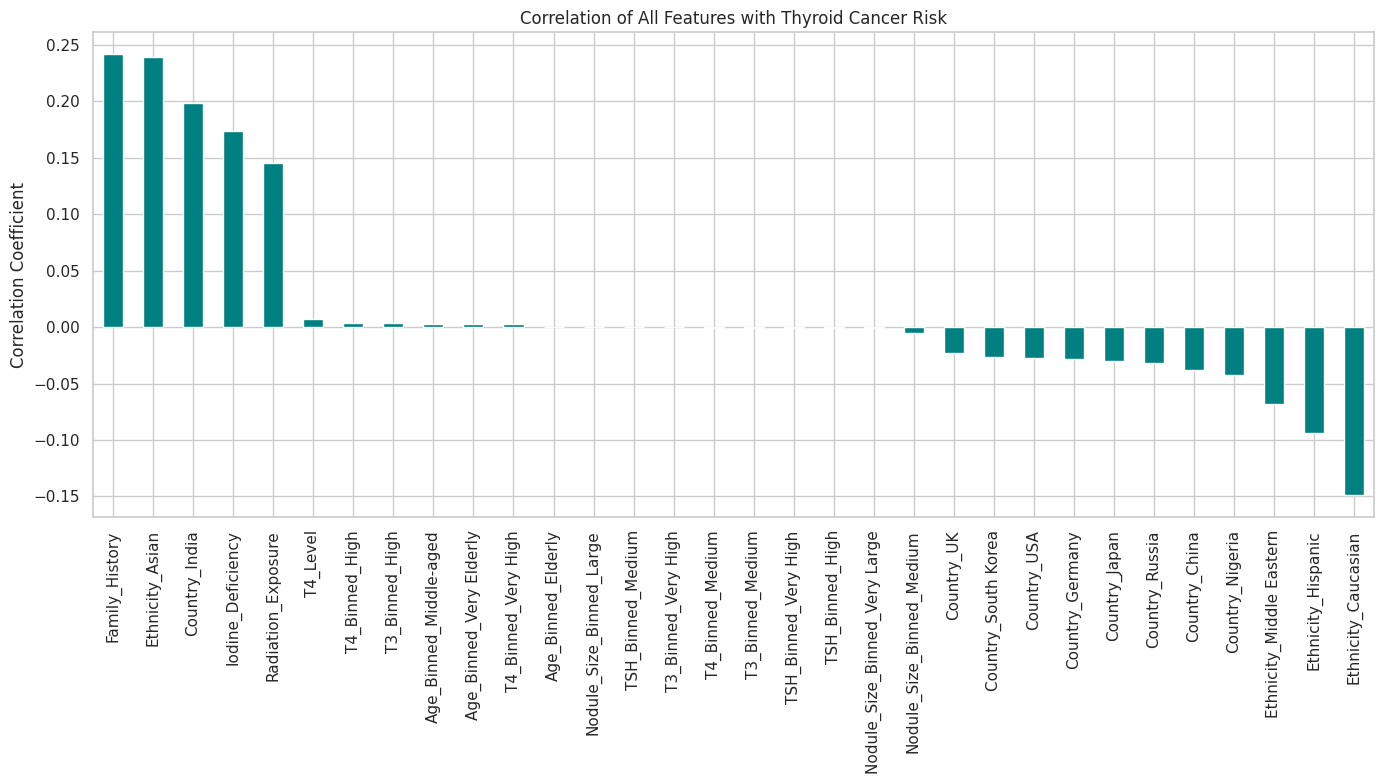

In [ ]:
cor_target = df_encoded.corr()['Thyroid_Cancer_Risk'].sort_values(ascending=False)
cor_target = cor_target.drop('Thyroid_Cancer_Risk') # Dropped Target

# Plot the correlation
plt.figure(figsize=(14, 8))
cor_target.plot(kind='bar', color='teal')

# Plot settings
plt.title('Correlation of All Features with Thyroid Cancer Risk')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

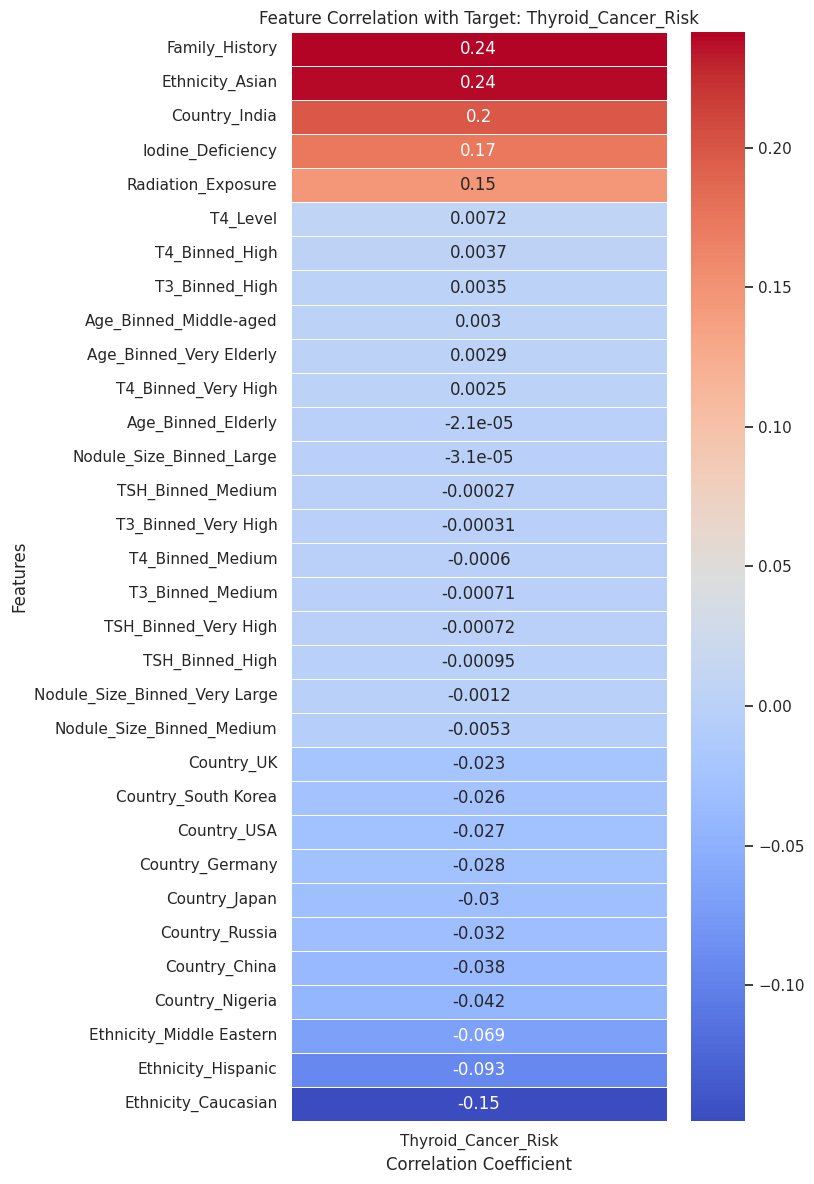

In [ ]:
# Heat Map of Correlation with Target

target_col = 'Thyroid_Cancer_Risk'

# Compute correlation matrix with the target
correlation_with_target = df_encoded.corr()[[target_col]].sort_values(by=target_col, ascending=False)

# Drop the target itself
correlation_with_target = correlation_with_target.drop(index=target_col)

# Plot heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title(f'Feature Correlation with Target: {target_col}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# **MACHINE LEARNING: TRAIN MODELS**

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced',n_estimators=100,max_depth=25,min_samples_leaf=2,random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.5869
              precision    recall  f1-score   support

           0       0.46      0.40      0.43      6497
           1       0.53      0.50      0.52      6497
           2       0.72      0.86      0.78      6497

    accuracy                           0.59     19491
   macro avg       0.57      0.59      0.58     19491
weighted avg       0.57      0.59      0.58     19491


Random Forest Results:
Accuracy: 0.7433
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      6497
           1       0.62      0.61      0.61      6497
           2       1.00      0.99      1.00      6497

    accuracy                           0.74     19491
   macro avg       0.74      0.74      0.74     19491
weighted avg       0.74      0.74      0.74     19491


Gradient Boosting Results:
Accuracy: 0.6917
              precision    recall  f1-score   support

           0       0.54      0.50      0.52      6

**Results**

In [ ]:
res_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

# Sort results by accuracy
res_df = res_df.sort_values(by=["Accuracy"], ascending=[False])

# Display the sorted results
res_df

,Model,Accuracy
1,Random Forest,0.743317
4,Decision Tree,0.709404
7,LightGBM,0.704941
6,XGBoost,0.704838
9,Neural Network (MLP),0.694628
2,Gradient Boosting,0.691653
8,K-Nearest Neighbors,0.678826
0,Logistic Regression,0.586886
3,AdaBoost,0.575291
5,Naive Bayes,0.553076


**Visualization of Model Results**

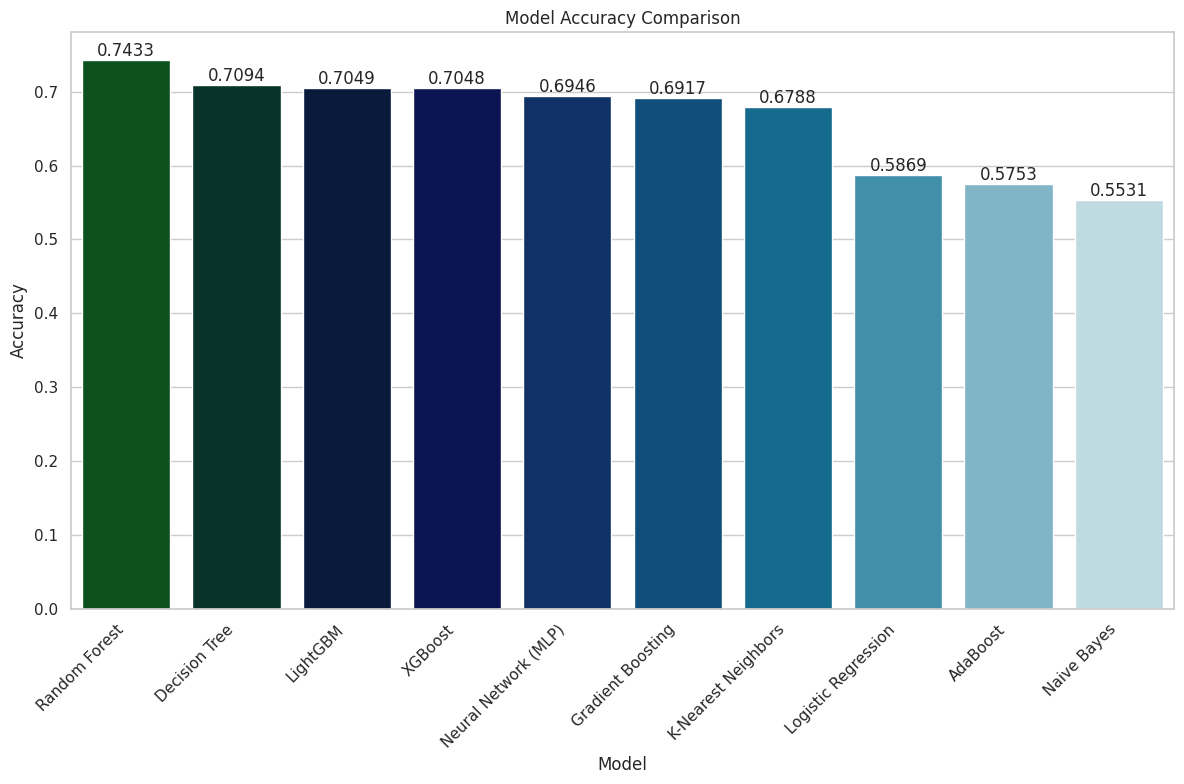

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=res_df, x="Model", y="Accuracy", palette="ocean")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")

# Add accuracy values on top of each bar
for i, v in enumerate(res_df['Accuracy']):
    ax.text(i, v, f'{v:.4f}', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

# **BEST MODEL**

In [ ]:
# Fit model
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# ROC AUC (Multiclass One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
roc_auc = roc_auc_score(y_test_binarized, y_proba_rf, average='weighted', multi_class='ovr')

# Print metrics
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")


Accuracy : 0.7545
Precision: 0.7549
Recall   : 0.7545
F1 Score : 0.7546
ROC AUC  : 0.8936


**Confusion Matrix**

In [ ]:
cn = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Feature Importance**

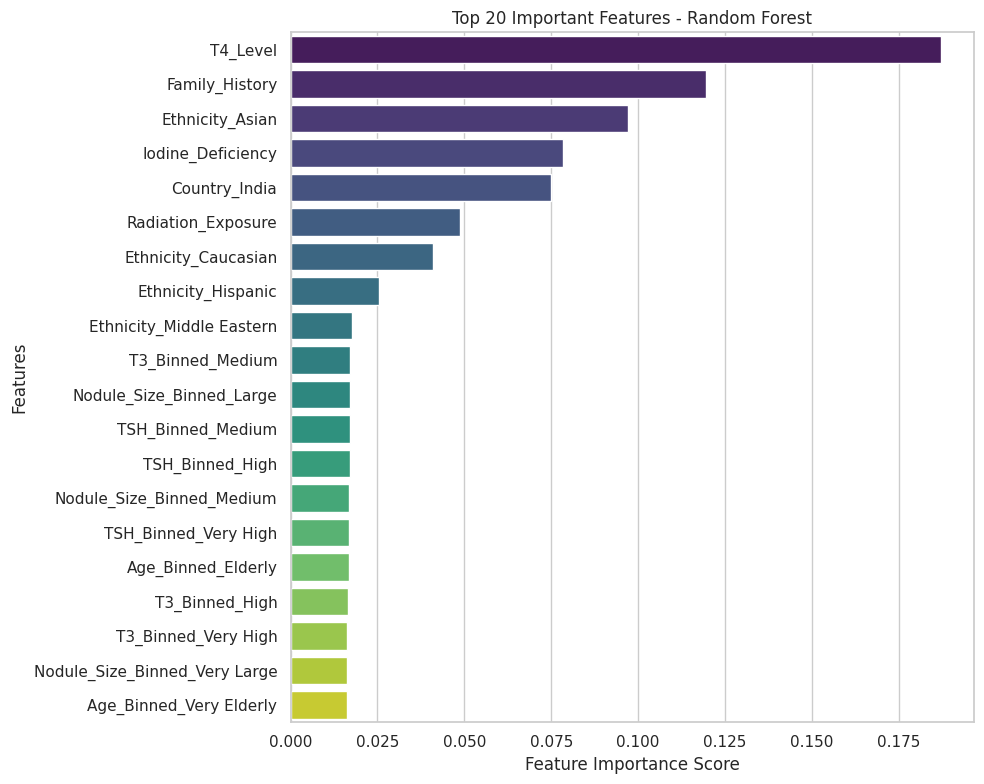

In [ ]:
# Get feature importances and feature names
importances = rf_model.feature_importances_

# Get the feature names from the original DataFrame X before scaling
feature_names = X.columns

# Create a DataFrame for sorting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Important Features - Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# **MODEL SAVING**

In [ ]:
# Save the Random Forest model
joblib.dump(rf_model, 'risk_predictor.pkl',compress=5)
print("Random Forest model saved as 'random_forest_model.pkl'")

Random Forest model saved as 'random_forest_model.pkl'


In [ ]:
binning_edges = {
    'TSH_Level': pd.qcut(df_sample['TSH_Level'], q=4, retbins=True, duplicates='drop')[1],
    'T3_Level': pd.qcut(df_sample['T3_Level'], q=4, retbins=True, duplicates='drop')[1],
    'T4_Level': pd.qcut(df_sample['T4_Level'], q=4, retbins=True, duplicates='drop')[1],
    'Age': pd.qcut(df_sample['Age'], q=4, retbins=True, duplicates='drop')[1],
    'Nodule_Size': pd.qcut(df_sample['Nodule_Size'], q=4, retbins=True, duplicates='drop')[1]
}

joblib.dump(binning_edges, 'binning_edges_risk.pkl')


In [ ]:
joblib.dump(X.columns.tolist(), 'feature_columns_risk.pkl')

In [ ]:
joblib.dump(scaler, 'scaler_risk.pkl')


['scaler_risk.pkl']